In [10]:
import numpy as np
import matplotlib.pyplot as plt
from unc_tools import UncRegression, FunctionBase1D
import os

from scipy.integrate import odeint
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp

SAVE_DIR = os.path.expanduser("~/Obsidian/physha_practice/Кинетика_автоколебаний/")
def savefig(name, path= "", fig=None, bbox_inches = None, **kwargs):
    os.makedirs(SAVE_DIR, exist_ok=True)
    if bbox_inches is None:
        bbox_inches = "tight"
    if fig is None:
        fig = plt.gcf()
    new_path = os.path.join(SAVE_DIR, name)
    fig.savefig(new_path, bbox_inches = bbox_inches, **kwargs)
    fig.savefig(os.path.join(".", path, name), bbox_inches = bbox_inches, **kwargs)

UncRegression.latex_style(True)

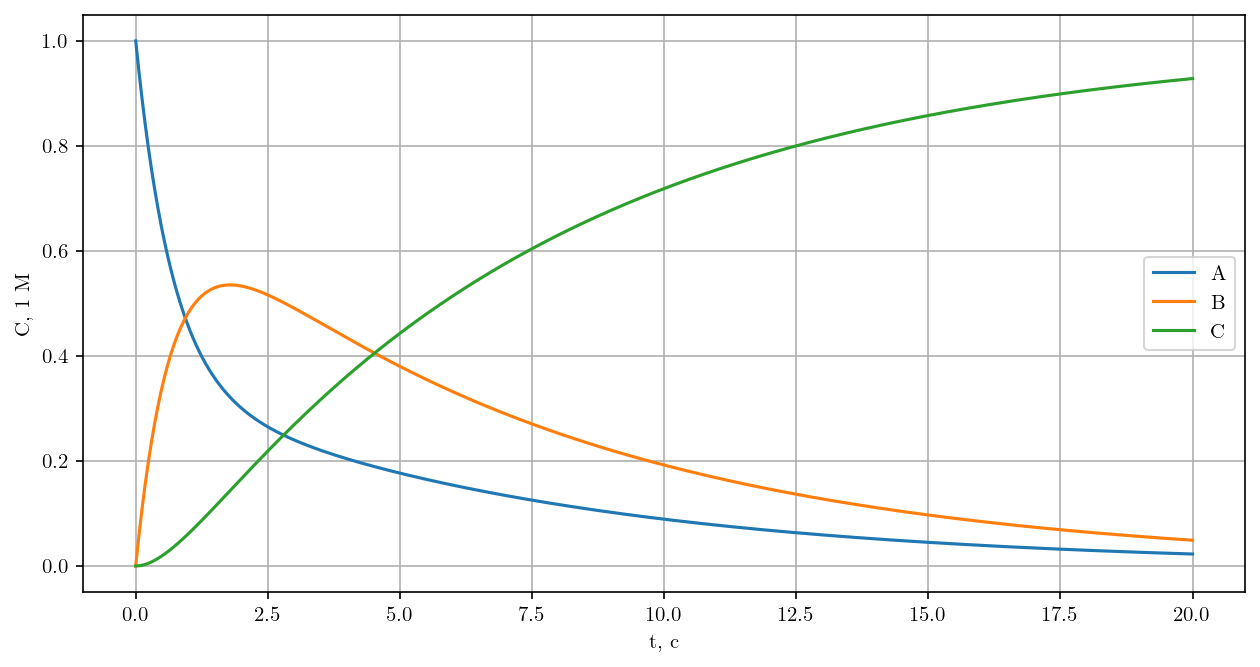

In [11]:

k1 = 1.0
k2 = 0.4
k3 = 0.2
A0 = 1.0



def f(y,t):
    A,B,C = y
    dA = -k1*A + k2*B
    dB = k1*A - (k2+k3)*B
    dC = k3*B
    return [dA,dB,dC]

t = np.linspace(0,20,1000)
y0 = [A0,0,0]
sol = odeint(f, y0, t)
A_num, B_num, C_num = sol[:,0], sol[:,1], sol[:,2]

plt.figure(figsize=(10,5), dpi= 150)
plt.plot(t, A_num, label="A")
plt.plot(t, B_num, label="B")
plt.plot(t, C_num, label="C")
plt.grid()
plt.legend()

plt.xlabel("t, c")
plt.ylabel("C, 1 М")

savefig("num_sol")

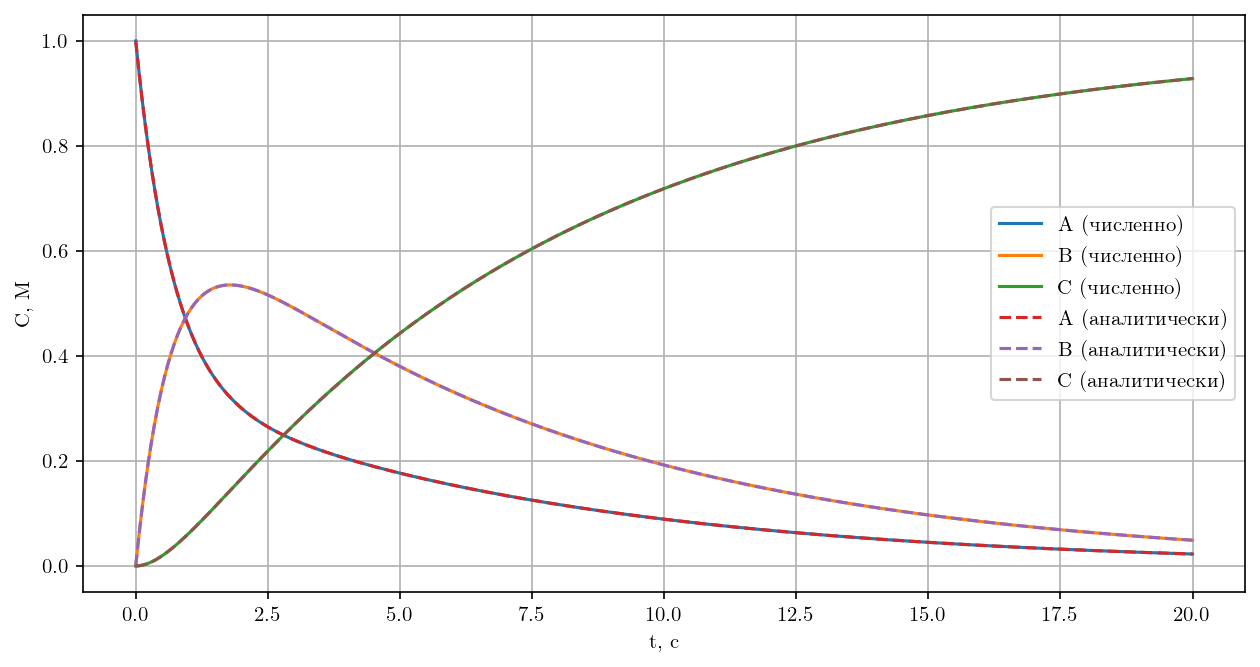

In [12]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

k1 = 1.0
k2 = 0.4
k3 = 0.2
A0 = 1.0

s = k1 + k2 + k3
D = s*s - 4*k1*k3
lambda1 = -(s - np.sqrt(D))/2
lambda2 = -(s + np.sqrt(D))/2

def A_an(t):
    return A0 * ((k1+lambda1)*np.exp(lambda2*t) - (k1+lambda2)*np.exp(lambda1*t)) / (lambda1-lambda2)

def B_an(t):
    return A0 * k1*(np.exp(lambda1*t) - np.exp(lambda2*t)) / (lambda1-lambda2)

def C_an(t):
    return A0 - A_an(t) - B_an(t)

# численная система
def f(y,t):
    A,B,C = y
    dA = -k1*A + k2*B
    dB = k1*A - (k2+k3)*B
    dC = k3*B
    return [dA,dB,dC]

t = np.linspace(0,20,1000)
y0 = [A0,0,0]
sol = odeint(f, y0, t)
A_num, B_num, C_num = sol[:,0], sol[:,1], sol[:,2]

plt.figure(figsize=(10,5), dpi=150)


plt.plot(t, A_num, '-',  label="A (численно)")
plt.plot(t, B_num, '-',  label="B (численно)")
plt.plot(t, C_num, '-',  label="C (численно)")

plt.plot(t, A_an(t), '--', label="A (аналитически)")
plt.plot(t, B_an(t), '--', label="B (аналитически)")
plt.plot(t, C_an(t), '--', label="C (аналитически)")

plt.grid()
plt.legend()

plt.xlabel("t, c")
plt.ylabel("C, М")

savefig("num_vs_analytic.png")

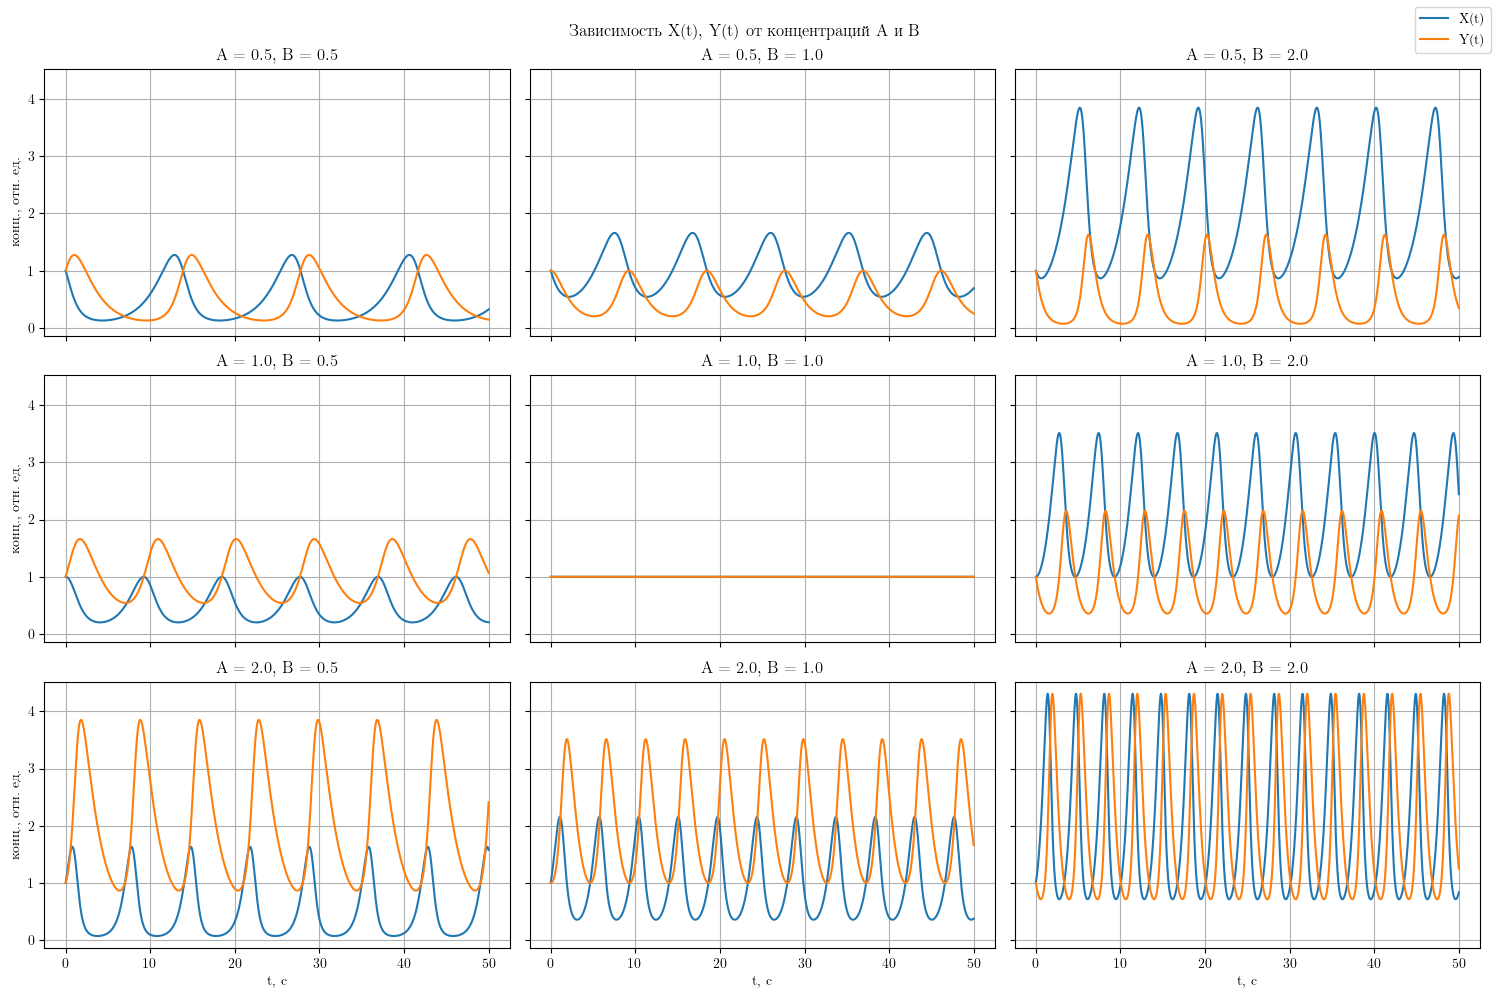

In [13]:
k1 = 1.0
k2 = 1.0
k3 = 1.0

def lv(y, t, A, B):
    X, Y = y
    dXdt = k1*A*X - k2*X*Y
    dYdt = k2*X*Y - k3*B*Y
    return [dXdt, dYdt]

t = np.linspace(0, 50, 5000)

A_list = [0.5, 1.0, 2.0]
B_list = [0.5, 1.0, 2.0]

X0 = 1.0
Y0 = 1.0
y0 = [X0, Y0]


fig, axes = plt.subplots(len(A_list), len(B_list),
                         figsize=(15, 10), sharex=True, sharey=True)

for i, A in enumerate(A_list):
    for j, B in enumerate(B_list):
        sol = odeint(lv, y0, t, args=(A, B))
        X = sol[:, 0]
        Y = sol[:, 1]

        ax = axes[i, j]
        ax.plot(t, X, label='X(t)')
        ax.plot(t, Y, label='Y(t)')
        ax.set_title(f'A = {A}, B = {B}')
        if i == len(A_list)-1:
            ax.set_xlabel('t, c')
        if j == 0:
            ax.set_ylabel('конц., отн. ед.')
        ax.grid()


handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle('Зависимость X(t), Y(t) от концентраций A и B', y=0.98)
plt.tight_layout()
savefig("conc_x_y_a_b")




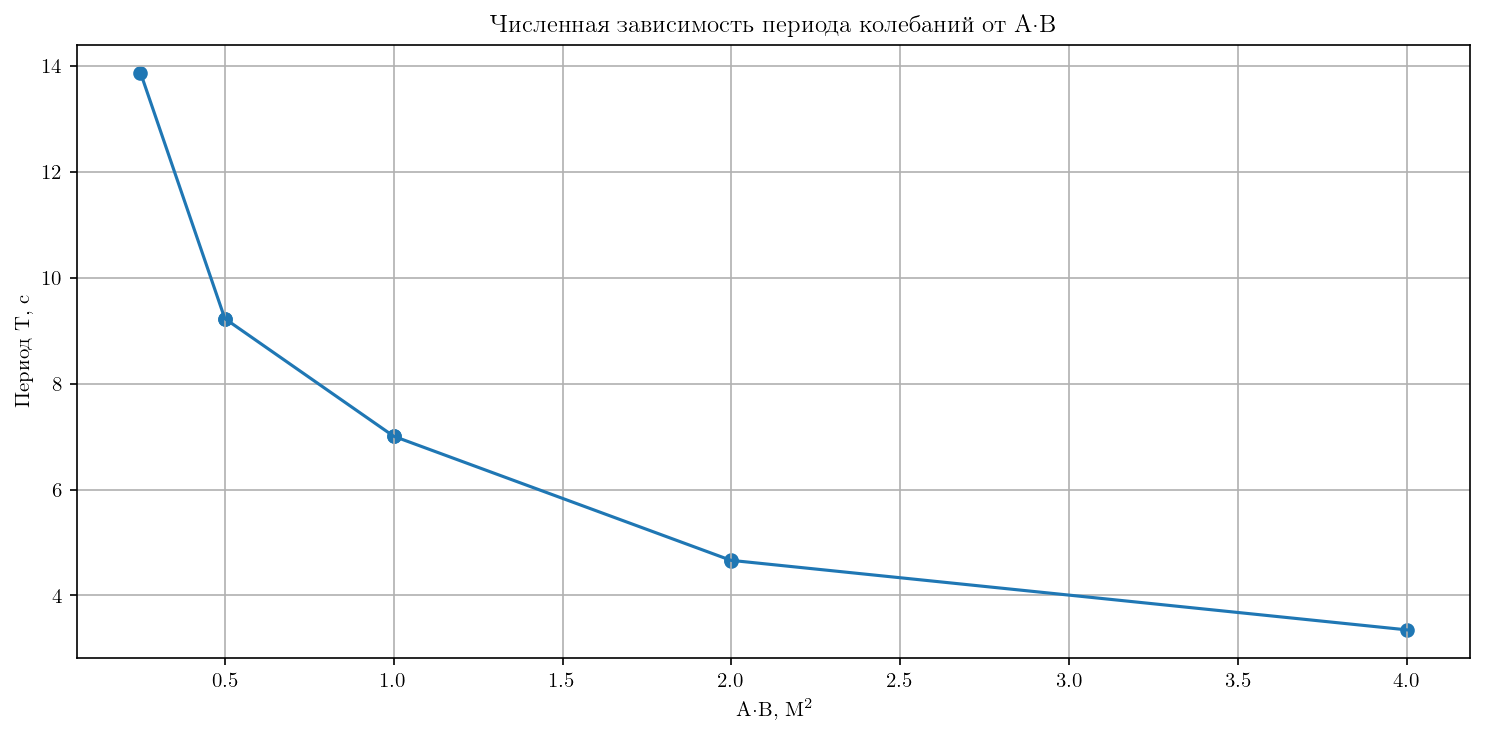

In [14]:
T_values = []
AB_values = []

for A in A_list:
    for B in B_list:
        sol = odeint(lv, y0, t, args=(A, B))
        Y = sol[:, 1]

        peaks, _ = find_peaks(Y, distance=50)
        if len(peaks) > 3:
            tt = t[peaks]
            T = np.mean(np.diff(tt[-5:]))
            T_values.append(T)
            AB_values.append(A*B)

plt.figure(figsize=(10,5), dpi = 150)
plt.scatter(AB_values, T_values)
plt.plot(sorted(AB_values),
         [T for _,T in sorted(zip(AB_values,T_values))])
plt.xlabel('A·B, M$^2$')
plt.ylabel('Период T, c')
plt.grid()
plt.title('Численная зависимость периода колебаний от A·B')
plt.tight_layout()
savefig("period_ab")


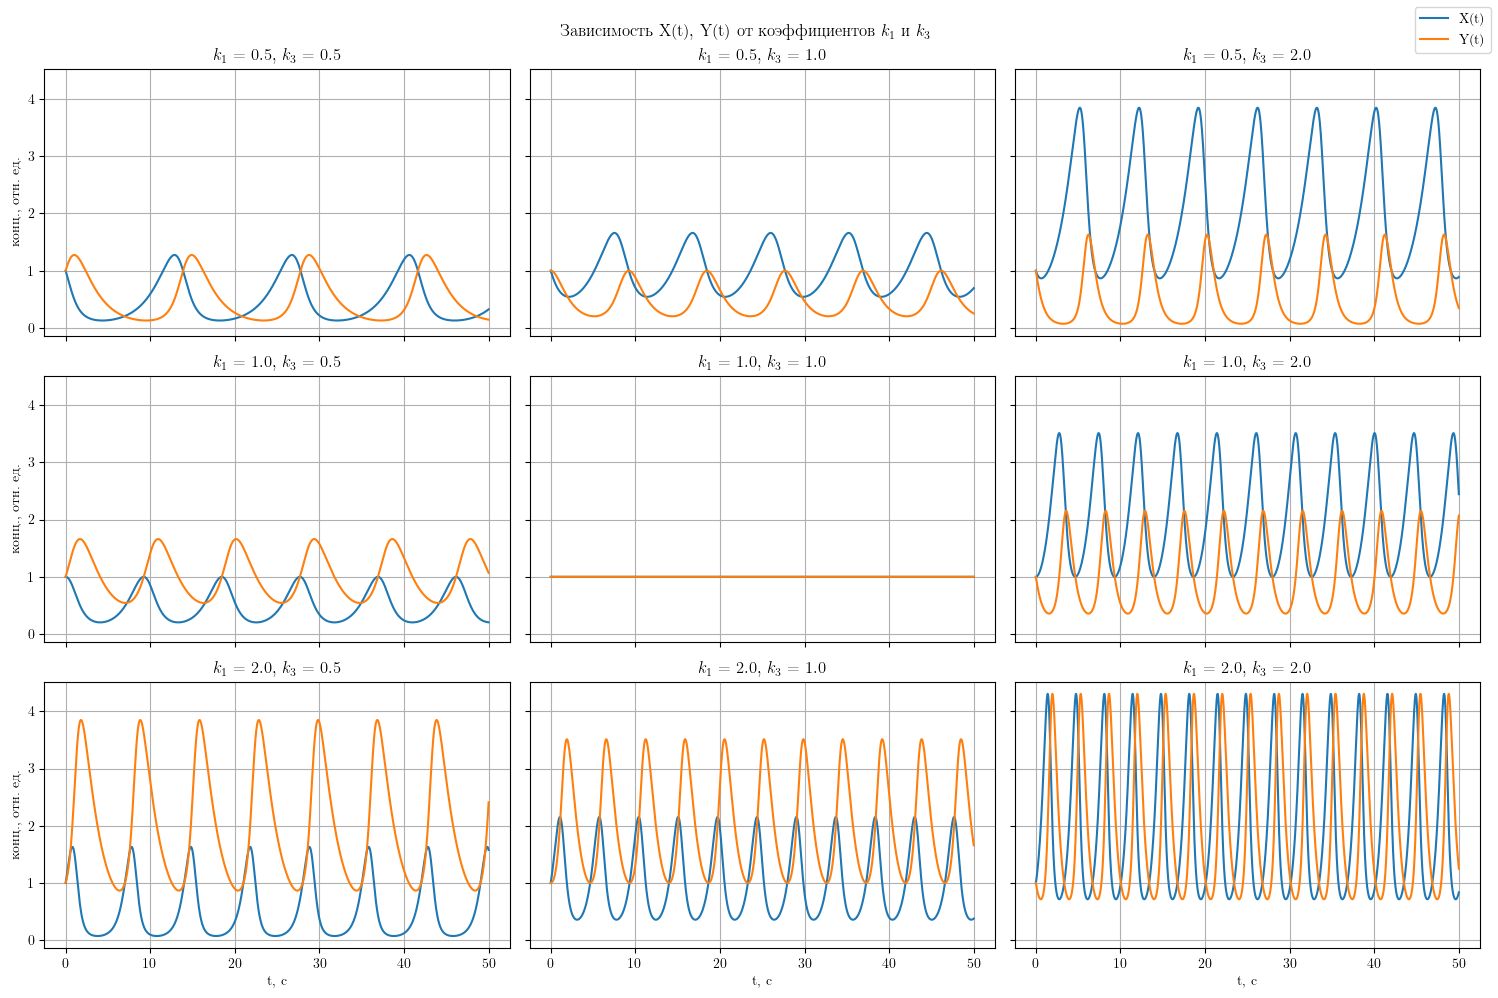

In [15]:


def lv(y, t, k1, k2, k3):
    X, Y = y
    dXdt = k1*X - k2*X*Y
    dYdt = k2*X*Y - k3*Y
    return [dXdt, dYdt]

t = np.linspace(0, 50, 5000)
k1_list = [0.5, 1.0, 2.0]
k3_list = [0.5, 1.0, 2.0]
X0 = 1.0
Y0 = 1.0
y0 = [X0, Y0]

fig, axes = plt.subplots(len(k1_list), len(k3_list),
                         figsize=(15, 10), sharex=True, sharey=True)

for i, k1 in enumerate(k1_list):
    for j, k3 in enumerate(k3_list):
        sol = odeint(lv, y0, t, args=(k1, 1.0, k3))
        X = sol[:, 0]
        Y = sol[:, 1]
        ax = axes[i, j]
        ax.plot(t, X, label='X(t)')
        ax.plot(t, Y, label='Y(t)')
        ax.set_title(f'$k_1$ = {k1}, $k_3$ = {k3}')
        if i == len(k1_list)-1:
            ax.set_xlabel('t, c')
        if j == 0:
            ax.set_ylabel('конц., отн. ед.')
        ax.grid()

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
fig.suptitle('Зависимость X(t), Y(t) от коэффициентов $k_1$ и $k_3$', y=0.98)
plt.tight_layout()
savefig("conc_x_y_k1_k3")



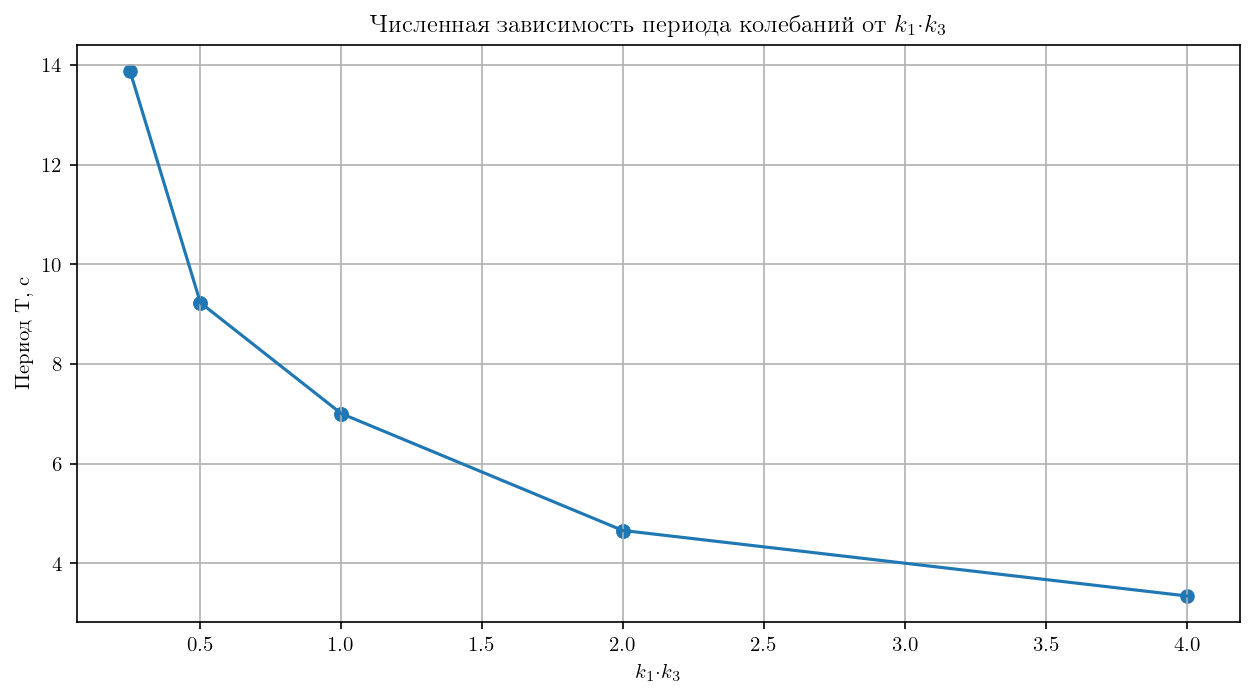

In [16]:
T_values = []
k1k3_values = []

for k1 in k1_list:
    for k3 in k3_list:
        sol = odeint(lv, y0, t, args=(k1, 1.0, k3))
        Y = sol[:, 1]
        peaks, _ = find_peaks(Y, distance=50)
        if len(peaks) > 3:
            tt = t[peaks]
            T = np.mean(np.diff(tt[-5:]))
            T_values.append(T)
            k1k3_values.append(k1*k3)
fig, ax = plt.subplots(figsize=(10,5), dpi=150)

ax.scatter(k1k3_values, T_values)
ax.plot(sorted(k1k3_values),
         [T for _, T in sorted(zip(k1k3_values, T_values))], label = 'Численно')


ax.set_xlabel('$k_1$·$k_3$')
ax.set_ylabel('Период T, c')
ax.grid()
ax.set_title('Численная зависимость периода колебаний от $k_1$·$k_3$')
savefig("period_k1k3", fig=fig)


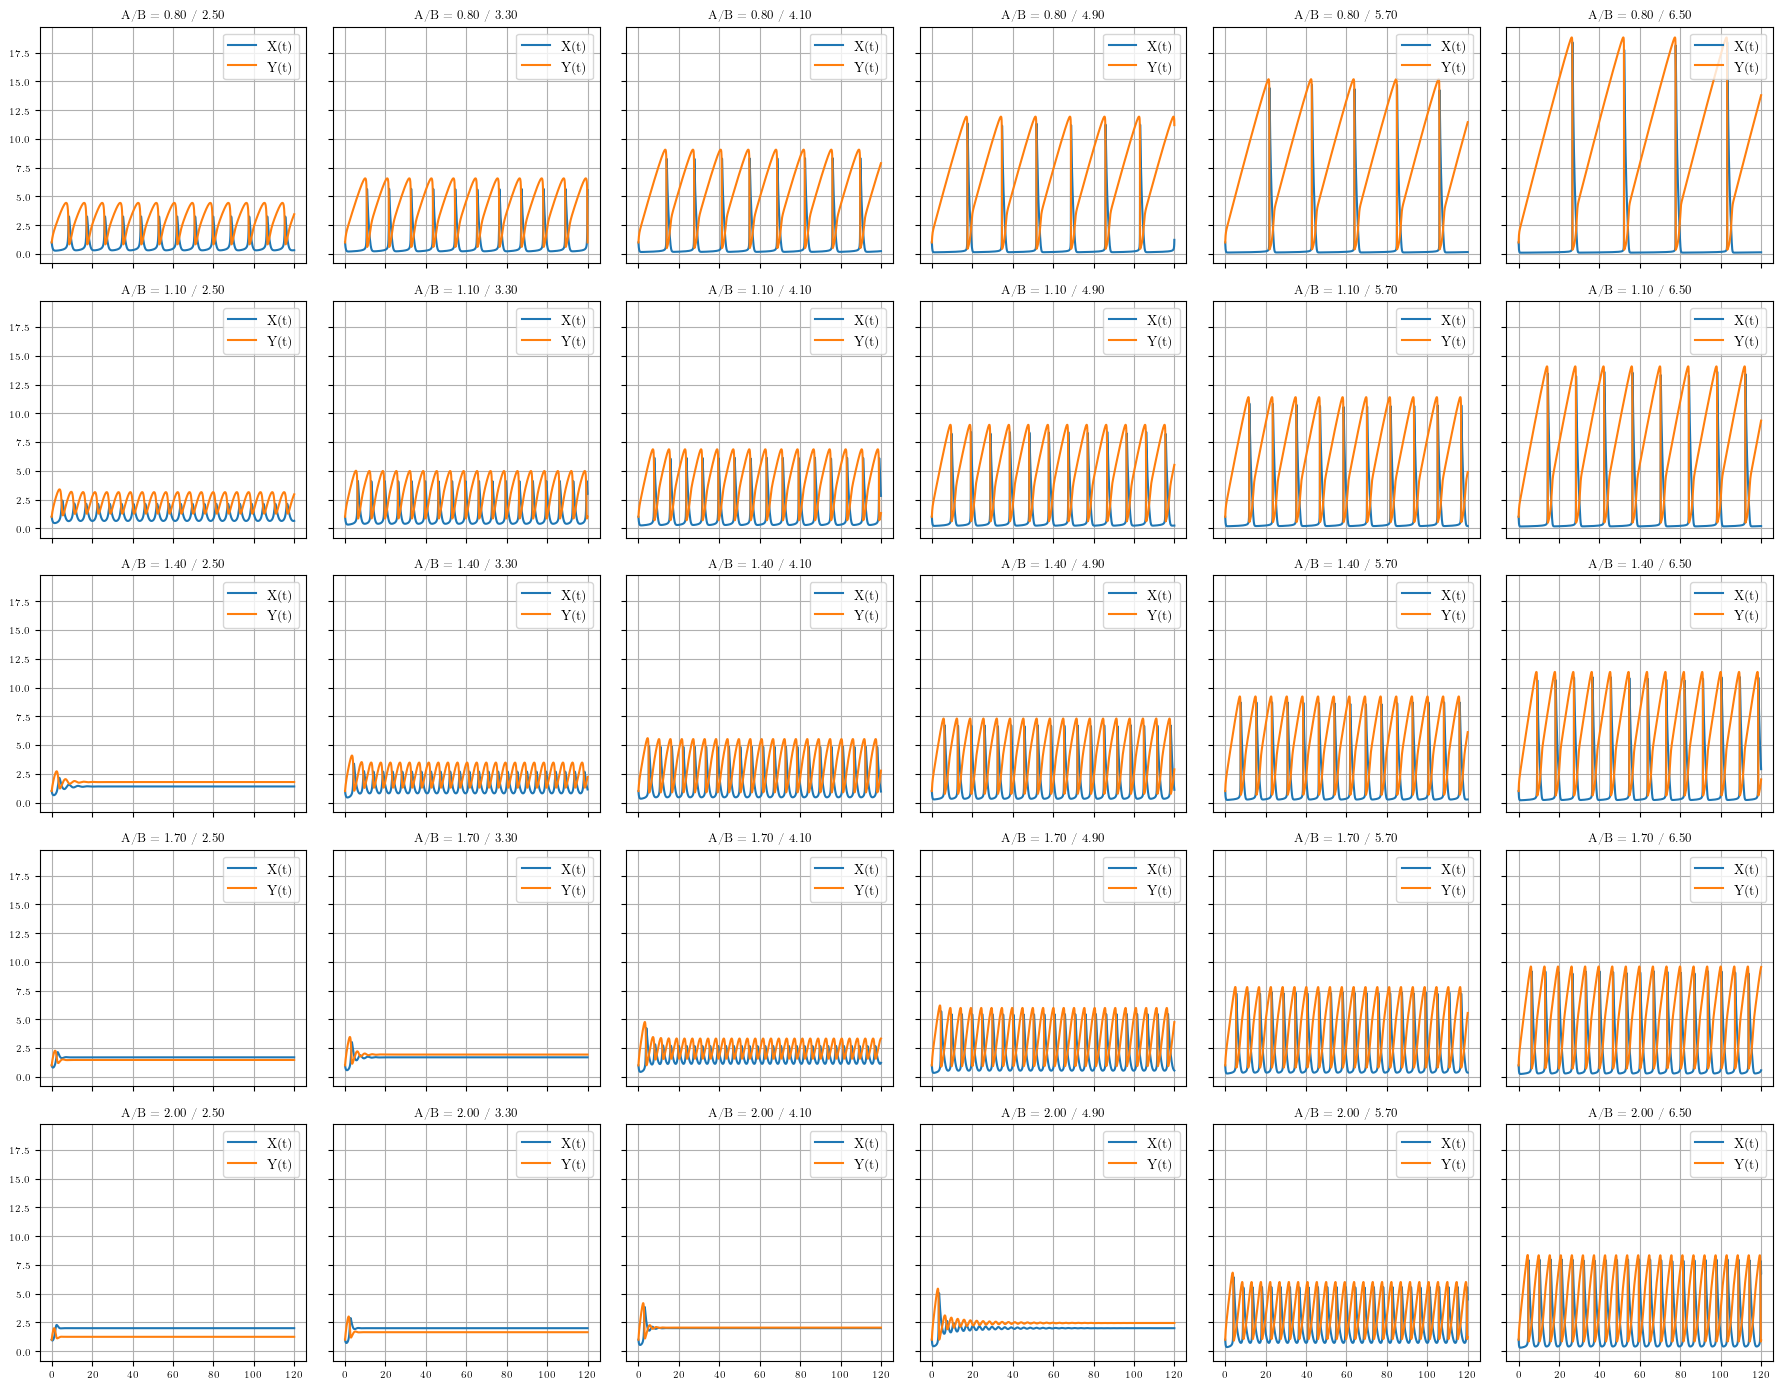

In [98]:
t_end = 120
n = 2000

def brusselator(t, z, A, B):
    x, y = z
    dx = A + x*x*y - (B + 1)*x
    dy = B*x - x*x*y
    return [dx, dy]

def simulate(A, B, t_end=t_end, n=n):
    t = np.linspace(0, t_end, n)
    sol = solve_ivp(
        brusselator,
        (0, t_end),
        [1.0, 1.0],
        args=(A, B),
        t_eval=t,
        rtol=1e-6,
        atol=1e-8
    )
    return sol.y[0], sol.y[1]

A_vals = np.linspace(0.8, 2.0, 5)
B_vals = np.linspace(2.5, 6.5, 6)

fig, axes = plt.subplots(len(A_vals), len(B_vals), figsize=(18, 14), sharex=True, sharey=True)
t = np.linspace(0, t_end, n)

for i, A in enumerate(A_vals):
    for j, B in enumerate(B_vals):
        x, y = simulate(A, B)
        ax = axes[i, j]
        ax.plot(t,x, label ="X(t)")
        ax.plot(t,y, label = "Y(t)")
        ax.grid()
        ax.set_title(f"A/B = {A:.2f} / {B:.2f}", fontsize=9)
        ax.tick_params(labelsize=7)
        ax.legend()

#fig.suptitle("Brusselator: x(t) и y(t) на одних осях\n(подпись — численное отношение A/B)", fontsize=16)
plt.tight_layout()
savefig("brusselator", fig=fig)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def brusselator(t, z, A, B):
    x, y = z
    return [
        A + x*x*y - (B + 1.0)*x,
        B*x - x*x*y
    ]

def has_oscillations(A, B):

    t = np.linspace(0, 60, 800)
    sol = solve_ivp(
        brusselator,
        (0, 60),
        [1.0, 1.0],
        args=(A, B),
        t_eval=t,
        rtol=1e-6,
        atol=1e-8
    )

    x = sol.y[0]
    x_ss = x[int(0.6 * len(x)):]
    return np.std(x_ss) > 0.05


# ОЧЕНЬ плотная сетка
A_vals = np.linspace(0.4, 2.4, 50)
B_vals = np.linspace(0.5, 7.0, 50)

osc_A, osc_B = [], []
stat_A, stat_B = [], []

i = 0
for A in A_vals:
    for B in B_vals:
        i += 1
        if has_oscillations(A, B):
            osc_A.append(A)
            osc_B.append(B)
        else:

            stat_A.append(A)
            stat_B.append(B)

print("Integration completed")

Integration completed


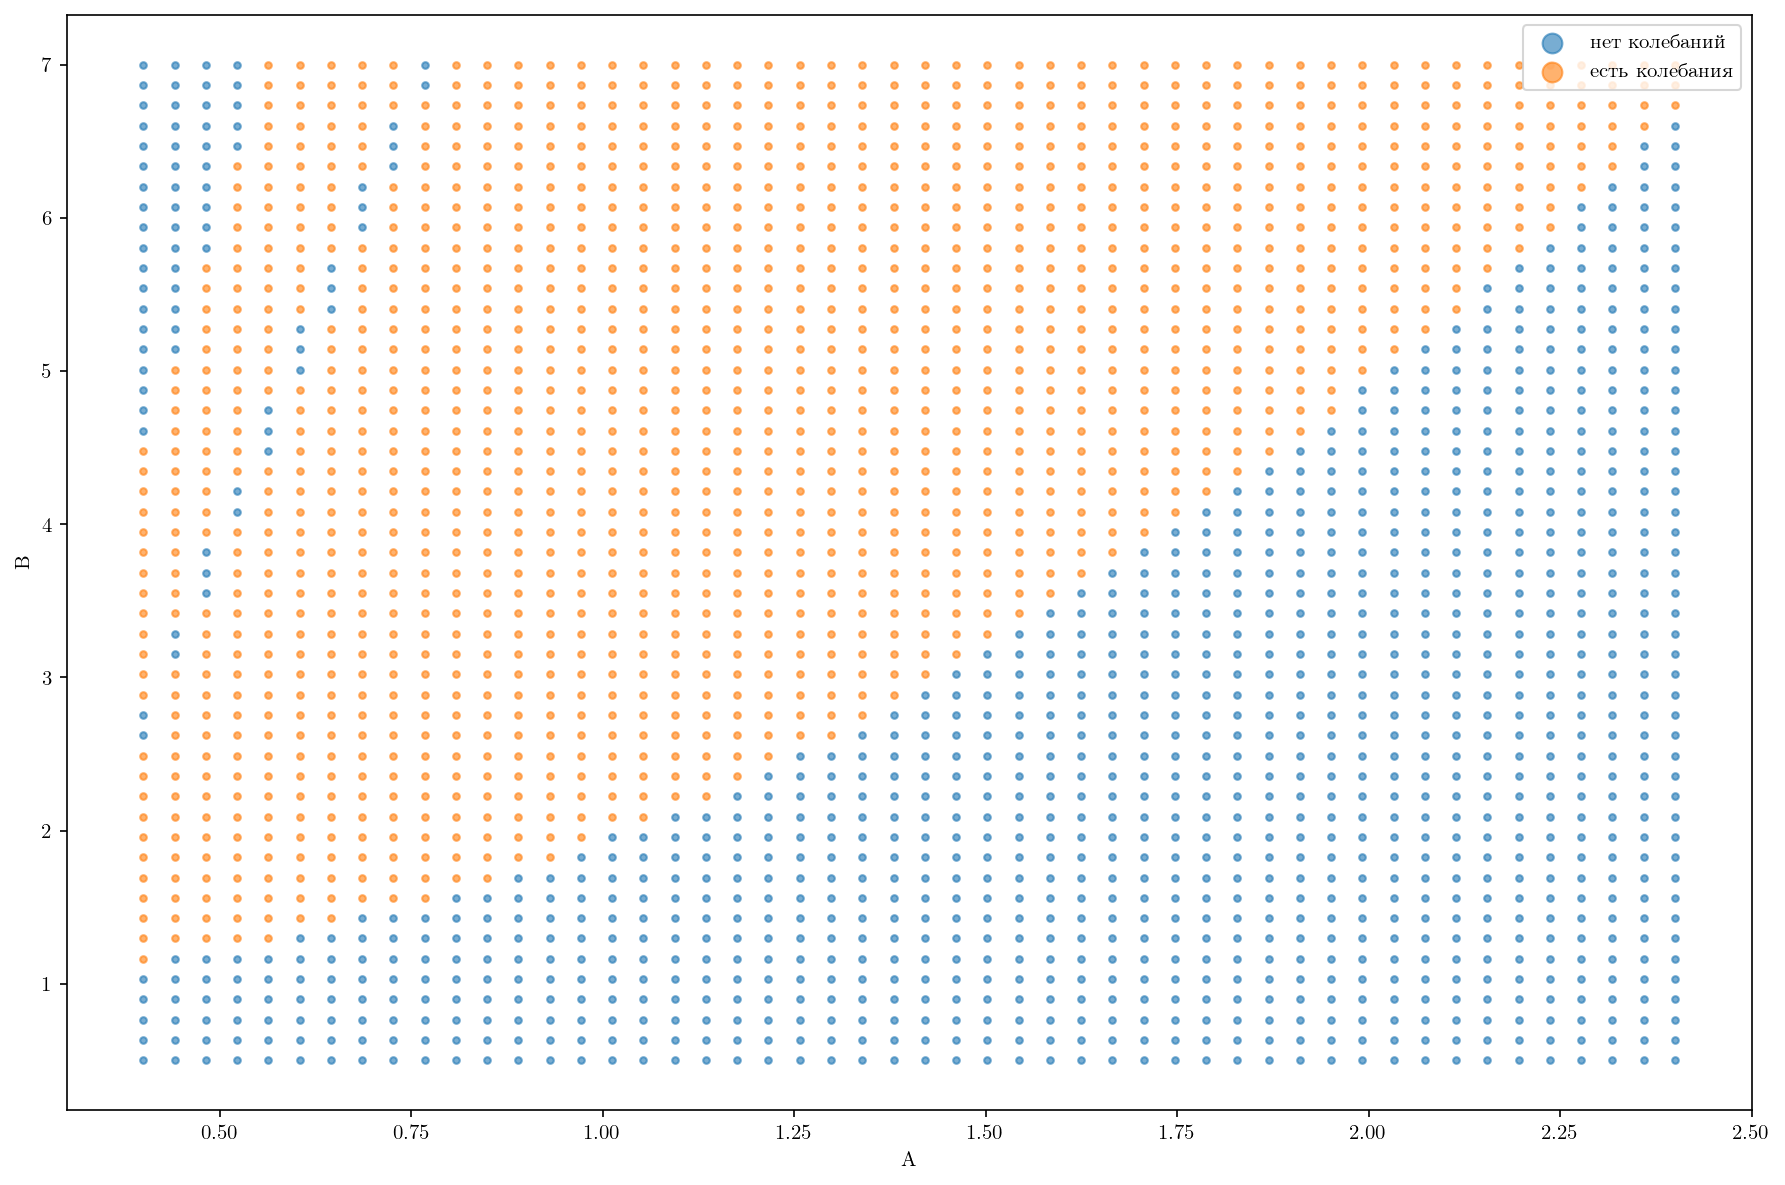

In [41]:
plt.figure(figsize=(12, 8), dpi=150)
plt.scatter(stat_A, stat_B, s=10, alpha=0.6, label="нет колебаний")
plt.scatter(osc_A, osc_B, s=10, alpha=0.6, label="есть колебания")
plt.xlabel("A")
plt.ylabel("B")
#plt.title("Брюсселятор: карта режимов")
plt.legend(markerscale=3)
plt.tight_layout()
savefig("brusselator2")

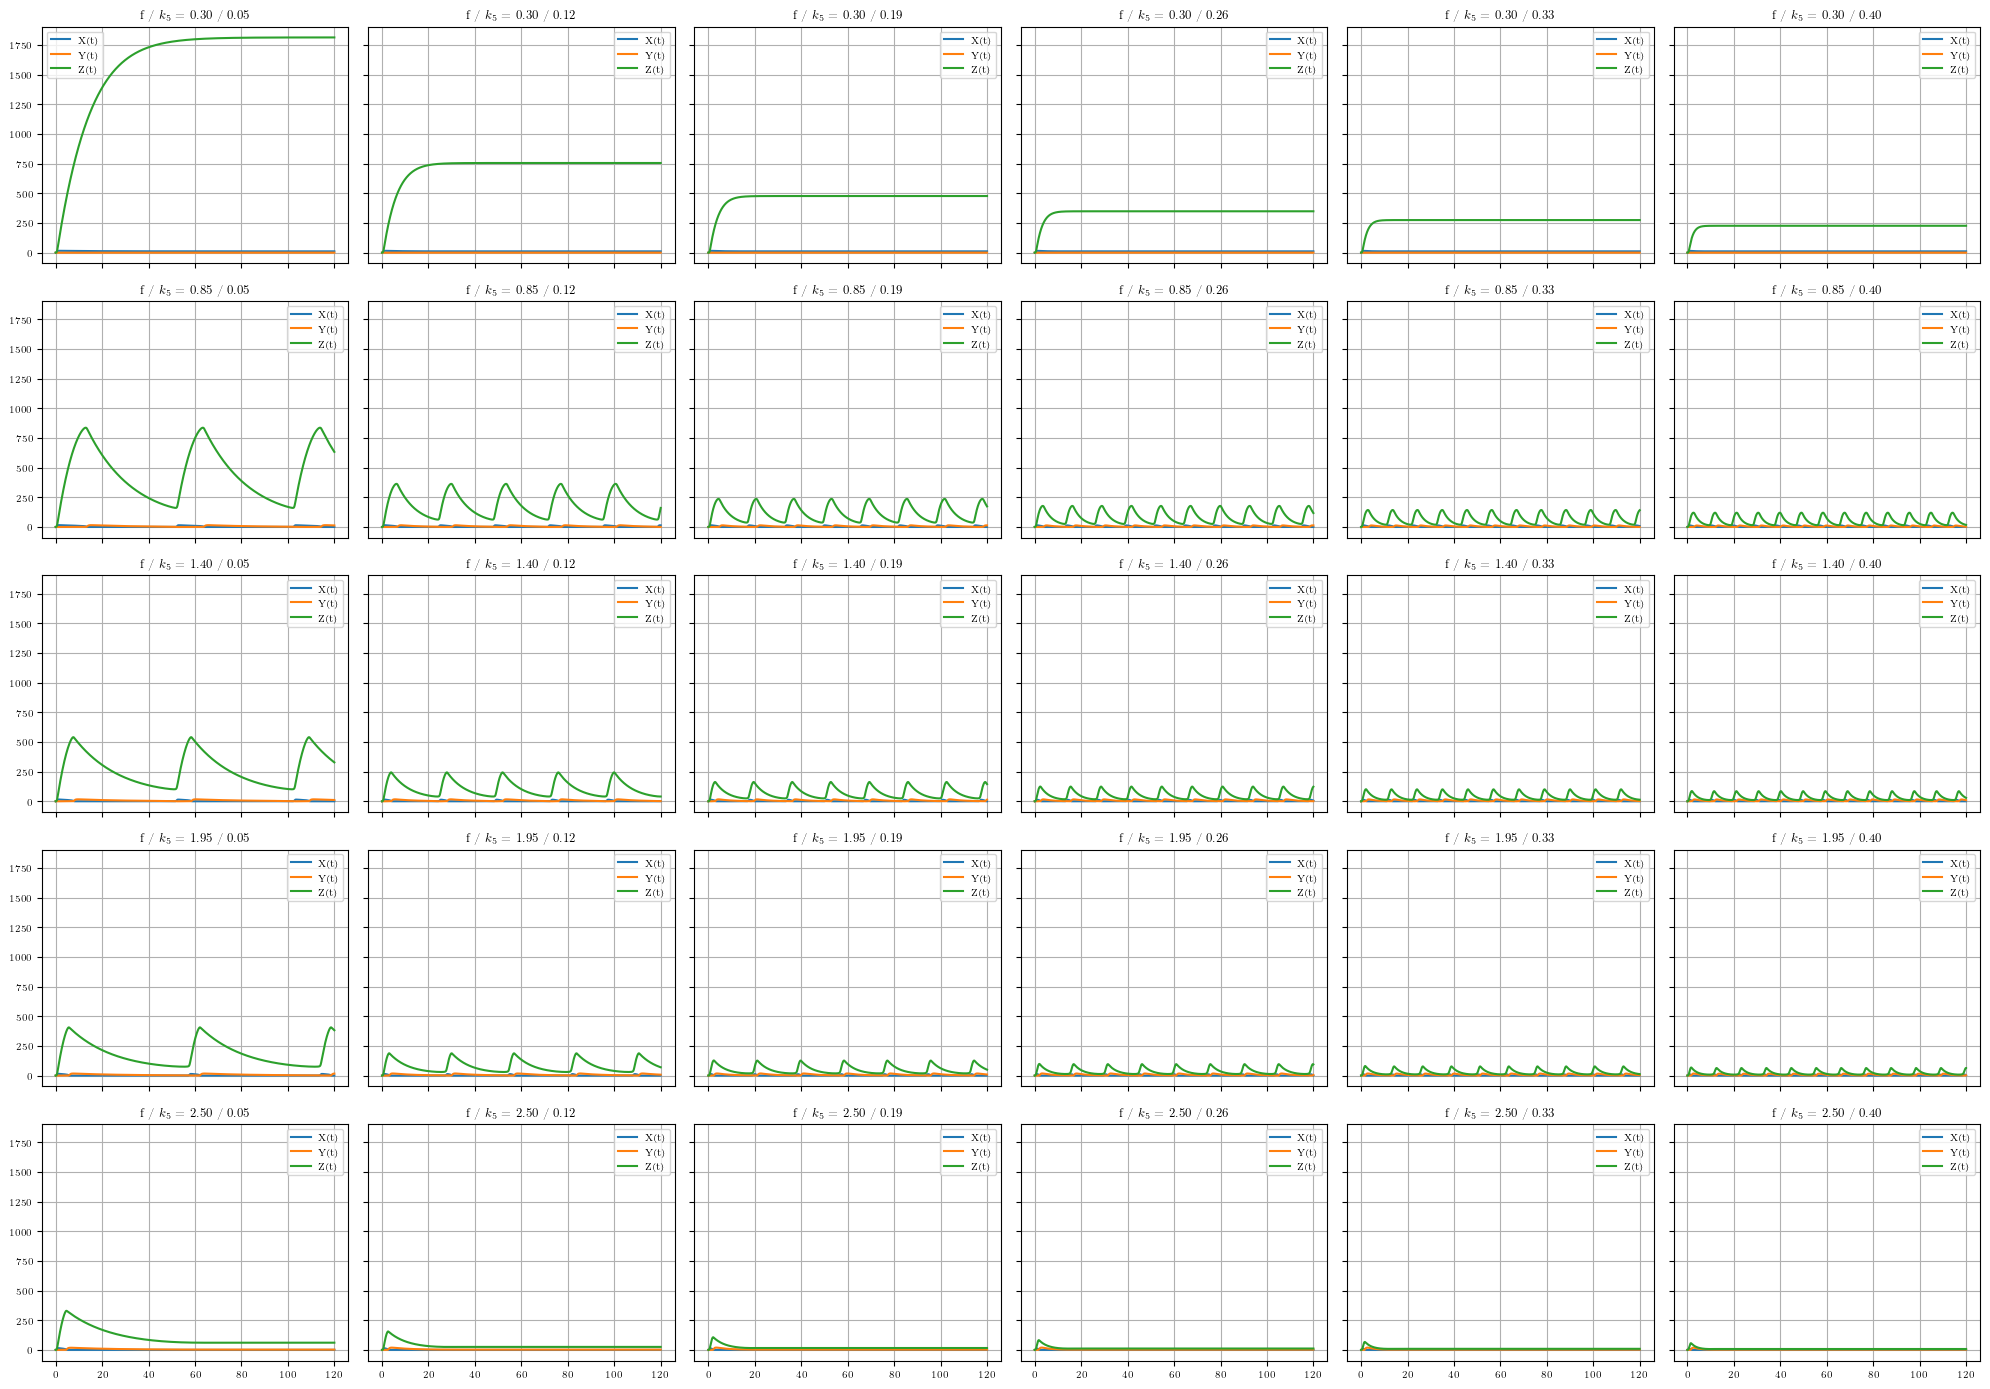

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp



t_end = 120
n = 2000

def oregonator(t, u, A0, B0, k1, k2, k3, k4, k5, f):
    X, Y, Z = u
    dX = k1*A0*Y - k2*X*Y + k3*B0*X - 2*k4*X*X
    dY = -k1*A0*Y - k2*X*Y + f*k5*Z
    dZ = k3*B0*X - k5*Z
    return [dX, dY, dZ]

def simulate(f, k5, t_end=t_end, n=n):
    t = np.linspace(0, t_end, n)
    sol = solve_ivp(
        oregonator,
        (0, t_end),
        [0.3, 0.3, 0.3],
        args=(A0, B0, k1, k2, k3, k4, k5, f),
        t_eval=t,
        rtol=1e-6,
        atol=1e-8
    )
    return t, sol.y

A0 = 1.0
B0 = 1.0
k1 = 1.0
k2 = 6.0
k3 = 8.0
k4 = 0.25


f_vals  = np.linspace(0.3, 2.5, 5)
k5_vals = np.linspace(0.05, 0.4, 6)

fig, axes = plt.subplots(
    len(f_vals),
    len(k5_vals),
    figsize=(20, 14),
    sharex=True,
    sharey=True
)

for i, f in enumerate(f_vals):
    for j, k5 in enumerate(k5_vals):
        t, (X, Y, Z) = simulate(f, k5)
        ax = axes[i, j]
        ax.plot(t, X, label="X(t)")
        ax.plot(t, Y, label="Y(t)")
        ax.plot(t, Z, label="Z(t)")
        ax.grid()
        ax.set_title(f"f / $k_5$ = {f:.2f} / {k5:.2f}", fontsize=9)
        ax.tick_params(labelsize=7)
        ax.legend(fontsize=7)

plt.tight_layout()
savefig("oreganator")

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def oregonator(t, u, A0, B0, k1, k2, k3, k4, k5, f):
    X, Y, Z = u
    dX = k1*A0*Y - k2*X*Y + k3*B0*X - 2*k4*X*X
    dY = -k1*A0*Y - k2*X*Y + f*k5*Z
    dZ = k3*B0*X - k5*Z
    return [dX, dY, dZ]

def has_oscillations(f, k5):
    t = np.linspace(0, 80, 800)
    sol = solve_ivp(
        oregonator,
        (0, 80),
        [0.3, 0.3, 0.3],
        args=(A0, B0, k1, k2, k3, k4, k5, f),
        t_eval=t,
        rtol=1e-6,
        atol=1e-8
    )

    X = sol.y[0]
    X_ss = X[int(0.6 * len(X)):]
    return np.std(X_ss) > 0.05


A0 = 1.0
B0 = 1.0
k1 = 1.0
k2 = 6.0
k3 = 8.0
k4 = 0.25

f_vals  = np.linspace(0.2, 3.0, 50)
k5_vals = np.linspace(0.02, 0.4, 50)

osc_f, osc_k5 = [], []
stat_f, stat_k5 = [], []

i = 0
for f in f_vals:
    for k5 in k5_vals:
        i += 1
        if has_oscillations(f, k5):
            osc_f.append(f)
            osc_k5.append(k5)
        else:
            stat_f.append(f)
            stat_k5.append(k5)

print("Integration completed:", i)

Integration completed: 2500


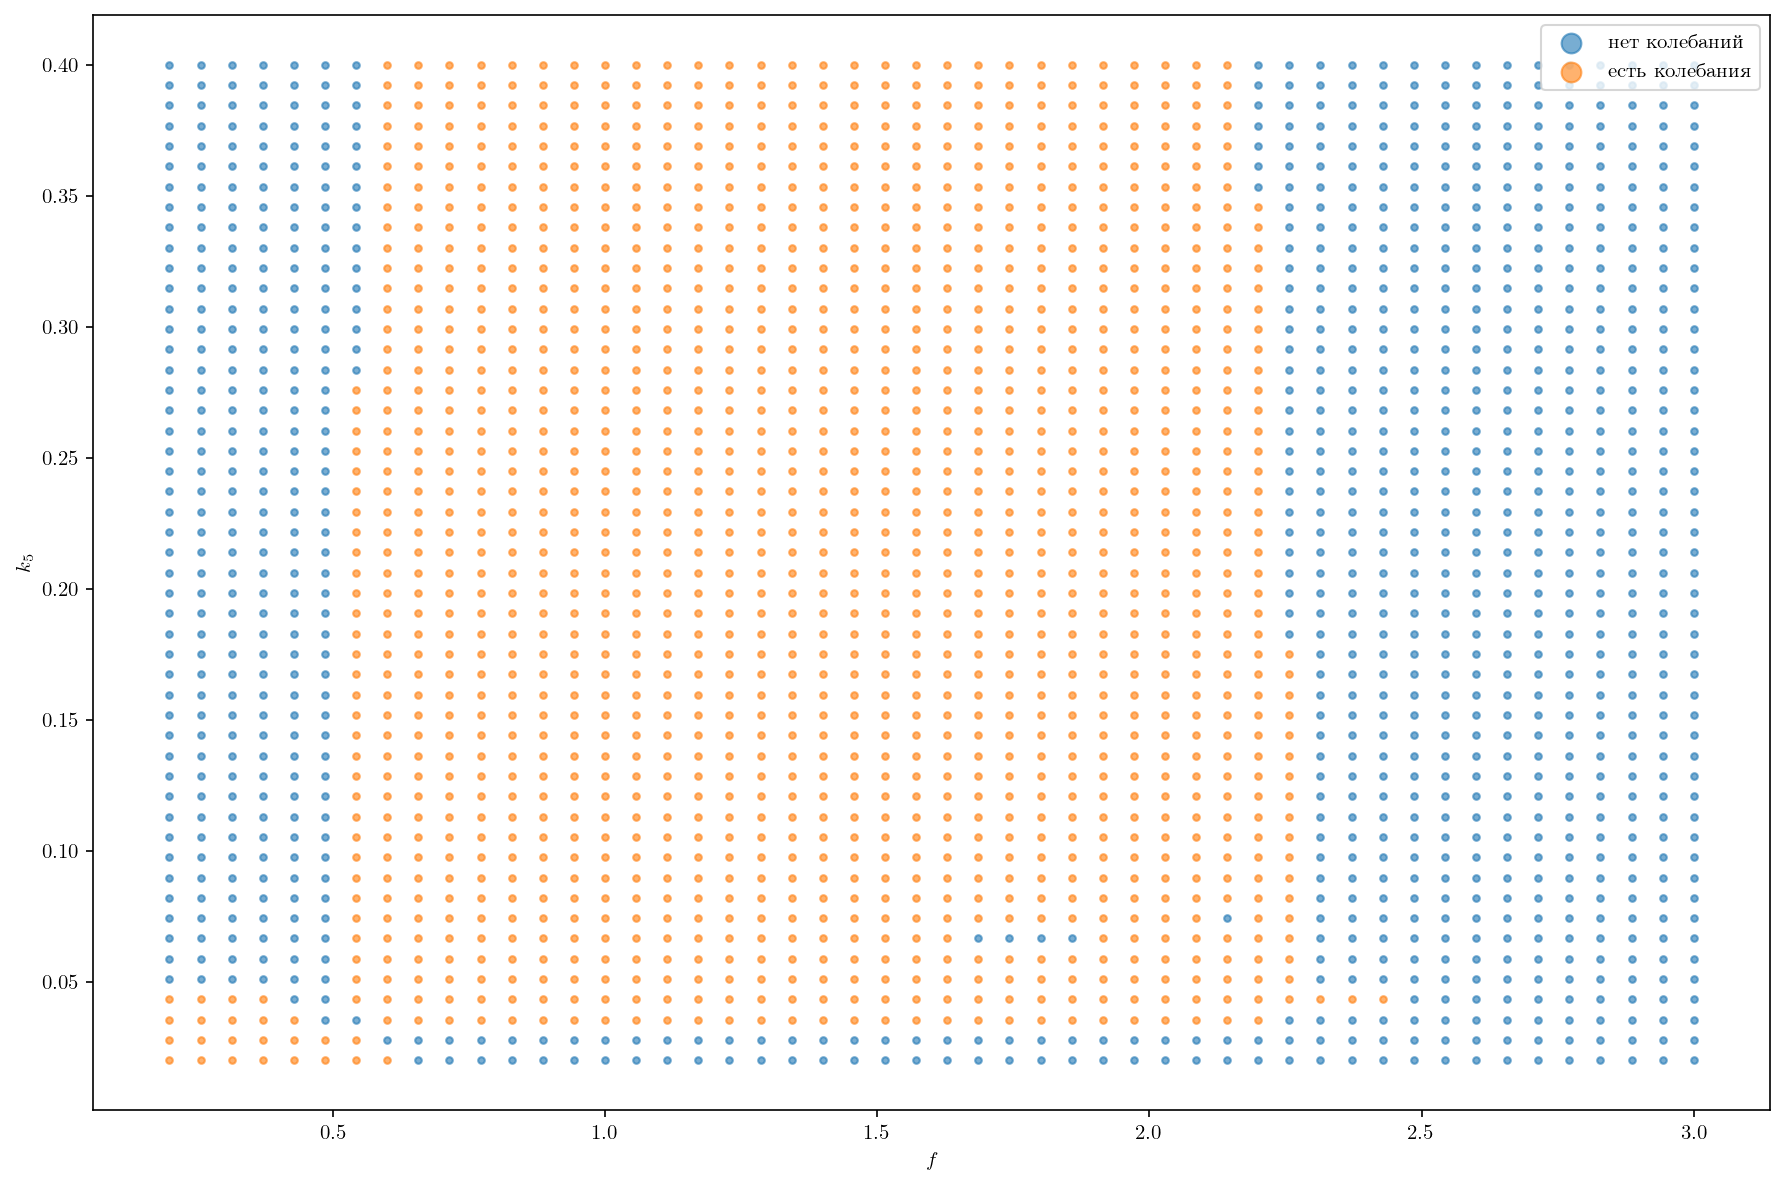

In [101]:
plt.figure(figsize=(12, 8), dpi=150)
plt.scatter(stat_f, stat_k5, s=10, alpha=0.6, label="нет колебаний")
plt.scatter(osc_f, osc_k5, s=10, alpha=0.6, label="есть колебания")
plt.xlabel("$f$")
plt.ylabel("$k_5$")
#plt.title("Брюсселятор: карта режимов")
plt.legend(markerscale=3)
plt.tight_layout()
savefig("oreganator2")

/tmp/ipykernel_13249/3266246738.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


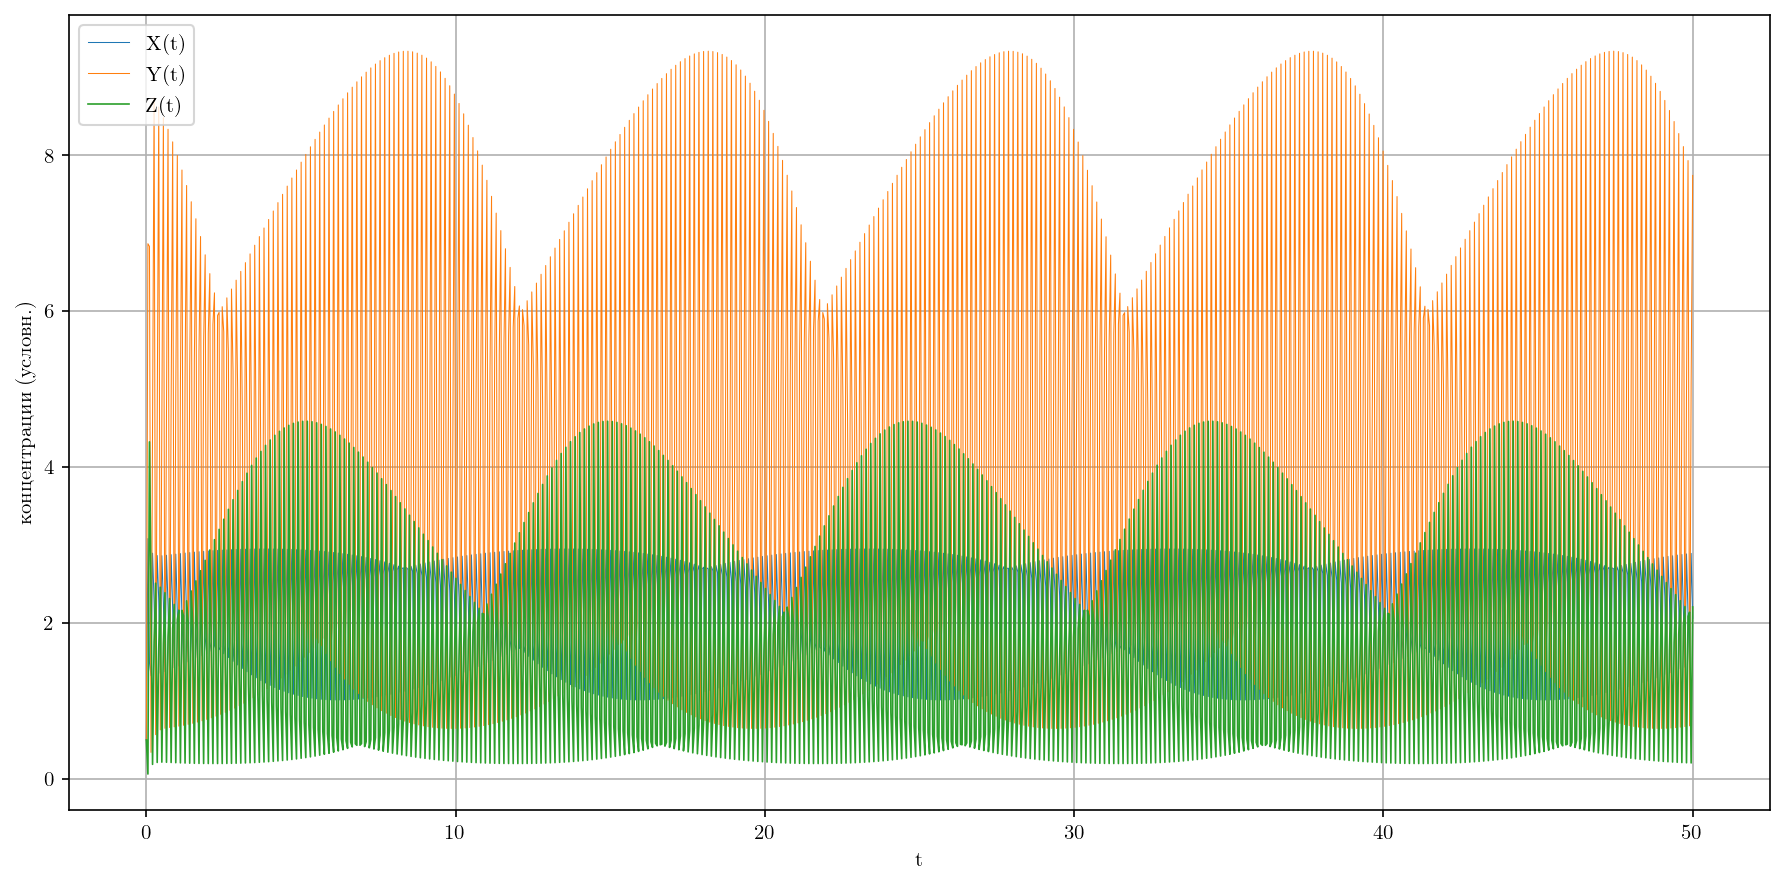

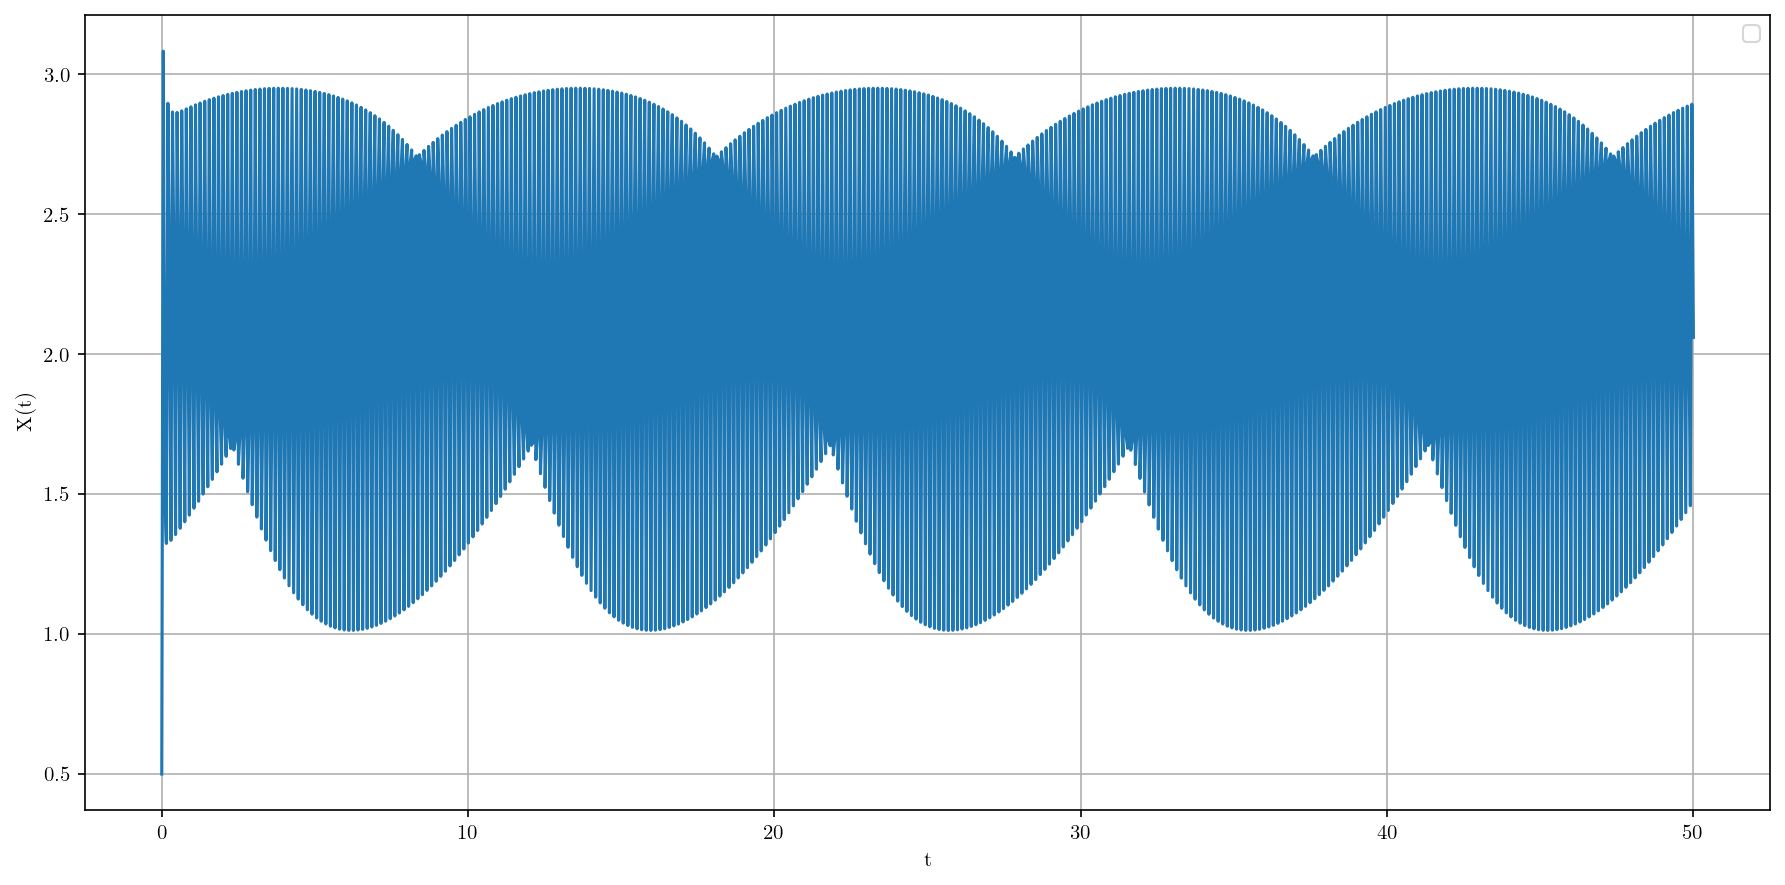

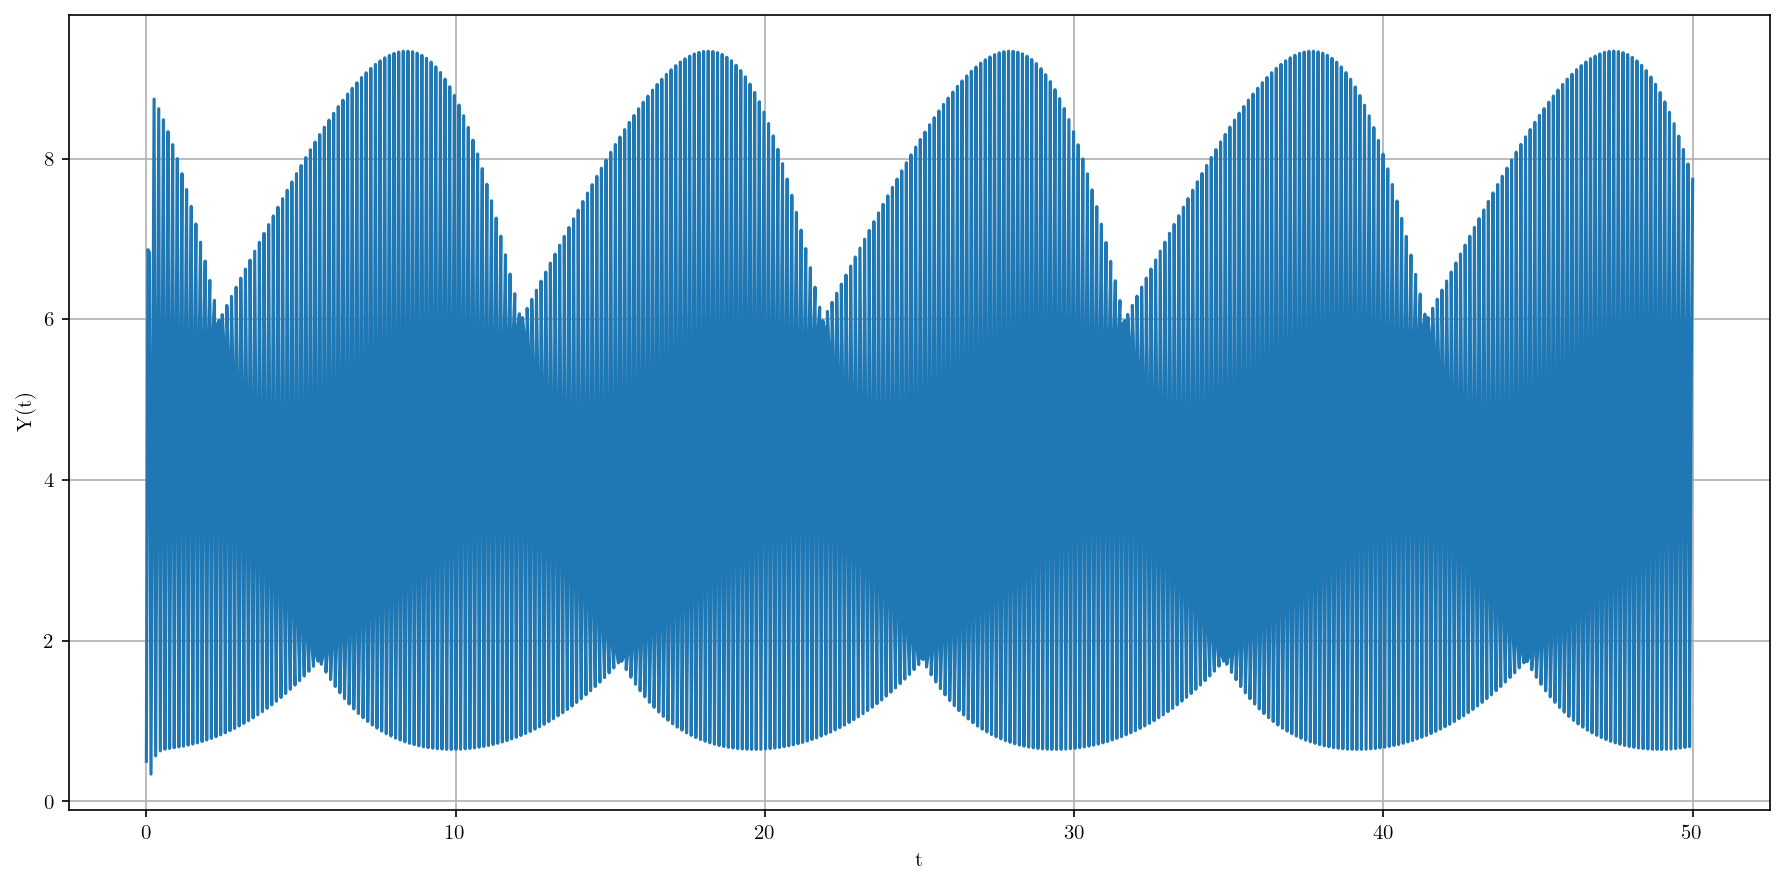

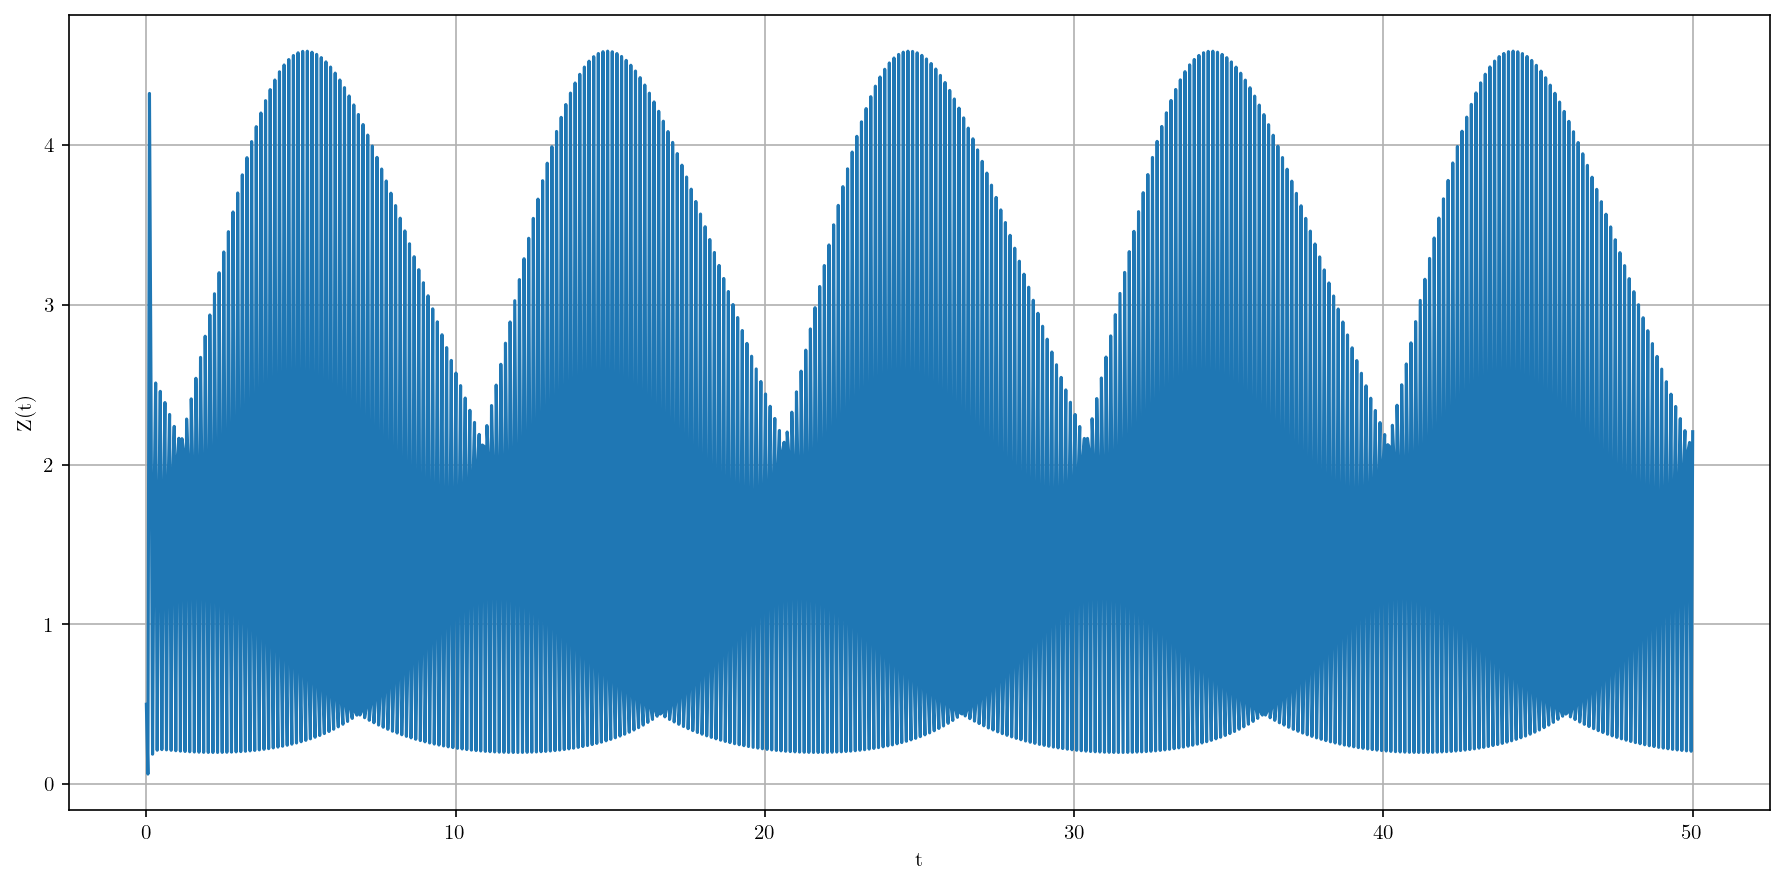

In [123]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def br_rhs(t,u,k1,k2,k3,k4,C):
    x,y,z=u
    return [
        k1*C - 2*k2*x*x - k4*x*z,
        2*k2*x*x - k3*y*z,
        k3*y*z - k4*x*z
    ]

k1, k2, k3, k4, C = (
    20,
    10,
    20,
    40,
    10
)


t_end = 50
t = np.linspace(0, t_end, 1000)
sol = solve_ivp(
    br_rhs, (0, t_end), [0.5, 0.5, 0.5],
    args=(k1,k2,k3,k4,C),
    t_eval=t, rtol=1e-6, atol=1e-8
)
x, y, z = sol.y

plt.figure(figsize=(12, 6),dpi=150)
plt.plot(t, x, linewidth = 0.5,label="X(t)")
plt.plot(t, y, linewidth = 0.5,label="Y(t)")
plt.plot(t, z, linewidth = 0.8,label="Z(t)")
plt.xlabel("t")
plt.ylabel("концентрации (условн.)")
plt.grid()
plt.legend()
plt.tight_layout()
savefig("brigs-raush")

plt.figure(figsize=(12, 6),dpi=150)
plt.plot(t, x)
plt.xlabel("t")
plt.ylabel("X(t)")
plt.legend()
plt.grid()
plt.tight_layout()
savefig("brigs-raush-x")

plt.figure(figsize=(12, 6),dpi=150)
plt.plot(t, y)
plt.xlabel("t")
plt.ylabel("Y(t)")
plt.grid()
plt.tight_layout()
savefig("brigs-raush-y")

plt.figure(figsize=(12, 6),dpi=150)
plt.plot(t, z)
plt.xlabel("t")
plt.ylabel("Z(t)")
plt.grid()
plt.tight_layout()
savefig("brigs-raush-z")

In [133]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

def brusselator(t, z, A, B):
    x, y = z
    return [
        A + x*x*y - (B + 1.0)*x,
        B*x - x*x*y
    ]

def has_oscillations(A, B):

    t = np.linspace(0, 60, 800)
    sol = solve_ivp(
        brusselator,
        (0, 60),
        [1.0, 1.0],
        args=(A, B),
        t_eval=t,
        rtol=1e-6,
        atol=1e-8
    )

    x = sol.y[0]
    x_ss = x[int(0.6 * len(x)):]
    return np.std(x_ss) > 0.05


A_vals = np.linspace(0, 4, 150)
B_vals = np.linspace(0, 20, 150)

osc_A, osc_B = [], []
stat_A, stat_B = [], []


osc_matrix = np.zeros((len(A_vals), len(B_vals)))
start = time.time()
for i, A in enumerate(A_vals):
    
    end = time.time()
    if i%10 == 0:
        print(f"{i/len(A_vals)*100:.2f}% completed; time: {(end-start)/60:.2f} min")
    
    for j, B in enumerate(B_vals):
        if has_oscillations(A, B):
            osc_matrix[i,j] = 1
        else:
            osc_matrix[i,j] = 0
        
print("Integration completed")

0.00% completed; time: 0.00 min
6.67% completed; time: 0.47 min
13.33% completed; time: 0.96 min
20.00% completed; time: 1.54 min
26.67% completed; time: 116.13 min
33.33% completed; time: 117.17 min
40.00% completed; time: 118.48 min
46.67% completed; time: 119.97 min
53.33% completed; time: 121.54 min
60.00% completed; time: 123.17 min
66.67% completed; time: 124.82 min
73.33% completed; time: 126.44 min
80.00% completed; time: 128.00 min
86.67% completed; time: 129.43 min
93.33% completed; time: 130.71 min
Integration completed


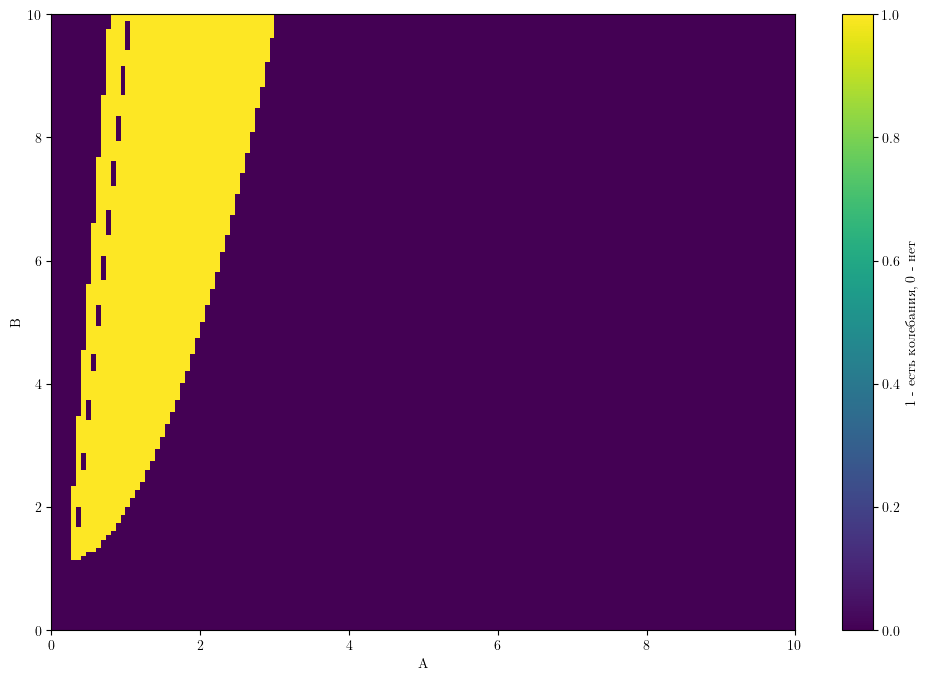

In [132]:
plt.figure(figsize=(12, 8))

plt.imshow(
    osc_matrix.T,
    origin="lower",
    aspect="auto",
    extent=[
        A_vals.min(),  A_vals.max(),
        B_vals.min(), B_vals.max()
    ],
)


plt.xlabel("A")
plt.ylabel("B")
plt.colorbar(label="1 - есть колебания, 0 - нет")

plt.show()
